# BankChurners

### *predicting bankchurners with credit-card customer attrition*


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
df = pd.read_csv("../../dataset/BankChurners/BankChurners.csv")
# Columns (5,6) have mixed types

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
# je ne m'intéresse pas aux 2 dernières colonnes
bankchurners = df.iloc[:,:-2]

In [5]:
bankchurners.shape

(10127, 21)

In [6]:
# changement de nom
bankchurners = bankchurners.rename(columns={"CLIENTNUM": "ClientNum"});bankchurners

,ClientNum,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [7]:
bankchurners.columns

Index(['ClientNum', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

### Types de variables:


| N°  | Variables       | Définition      | Types   |  Quantitative?    |  Qualitative?|
| :------------- | :------------- |:-------------| :-----|:-------------| :-------------|
| 1 | **ClientNum**     | Identifiant unique du client | `Integer` | *Continue*| -
| 2 | **Attrition_Flag**      | Indicateur indiquant si le client s'est retiré ou non      |   `Boolean` |  *Discrete*| -
| 3 | **Customer_Age** | Age du client      |    `Integer` | *Discrete*| - 
| 4 | **Gender** | Genre du client      |    `String` | - | *nominal*| 
| 5 | **Dependent_count** | Nombre de personnes à charge que le client a      |  `Integer` | *Discrete*| - 
| 6 | **Education_Level** | Niveau d'étude du client      | `String` | - | *ordinale* |
| 7 | **Marital_Status** | Statut Marital du client   | `String` | - | *nominal* | 
| 8 | **Income_Category** | Catégorie de salaire du client    | `String` | - | *ordinale* | 
| 9 | **Card_Category** | type de carte détenu par le client      | `String` | - | *nominal* | 
| 10 | **Months_on_book** | Durée d'enregistrement du client dans les registres | `Integer` | *Discrete*| - 
| 11 | **Total_Relationship_Count** | Nombre total de relations  ou d'échange entre le client et le fournisseur de carte de crédit      |    `Integer` | *Continue*| - 
| 12 | **Months_Inactive_12_mon** | Nombre de mois sur les douze derniers mois d'innactivités du client      |    `Integer` | *Discrete* | - 
| 13 | **Contacts_Count_12_mon** | Nombres de contacts par la banque le client a eu durant les 12 derniers mois |    `Integer` | *Continue* | - 
| 13 | **Credit_Limit** | Limite de crédit du client      |    `Float` | *Continue* | - 
| 14 | **Total_Revolving_Bal** | Total du solde renouvelable du client  | `Integer` | *Discrete*| - 
| 15 | **Avg_Open_To_Buy** | taux moyen d'ouverture à l'achat du client, indique le ratio entre les publicités reçu par le client et ceux qu'ils consultent | `Float` | *Continue*| - 
| 16 | **Total_Amt_Chng_Q4_Q1** | Montant total modifié du trimestre 4 au trimestre 1 |    `Integer` | *Continue* | - 
| 17 | **Total_Trans_Amt** | Montant total de la transaction |  `Integer` | *Continue* | - 
| 18 | **Total_Trans_Ct** | Nombre total de transactions |  `Integer` | *Continue* | - 
| 19 | **Total_Ct_Chng_Q4_Q1** | Le décompte total a changé du trimestre 4 au trimestre 1      |  `Float` | *Continue*| - 
| 20 | **Avg_Utilization_Ratio** | Taux d'utilisation moyen du client   |  `Float` | *Continue*| - 



In [8]:
#je renomme les variables
bankchurners.rename(columns = {
                     'Gender':'Gender',
                     'Attrition_Flag':'Attrition',
                     'Marital_Status':'Marital',
                     'Income_Category':'Income_cat',
                     'Card_Category':'Card_Cat',
                     'Months_on_book':'Months',
                     'Total_Relationship_Count':'Relationship_counts',
                     'Dependent_count':'Dependents',
                     'Customer_Age':'Age', 
                     'Education_Level':'Education',
                     'Months_Inactive_12_mon':'Inactive_Month',
                     'Contacts_Count_12_mon':'Contacts_on_12',
                     'Total_Revolving_Bal':'Total_Solde_Balancing',
                     'Avg_Open_To_Buy':'Average_Rate_Open',
                     'Total_Amt_Chng_Q4_Q1':'Amount_Changed_Q4_Q1',
                     'Total_Trans_Amt':'Amount_Total_transaction',
                     'Total_Trans_Ct':'Number_Total_transaction',
                     'Total_Ct_Chng_Q4_Q1':'Count_Change_Q4_Q1',
                     'Avg_Utilization_Ratio':'Average_Rate_Utilization'},inplace = True)

In [9]:
bankchurners.describe()

,ClientNum,Age,Dependents,Months,Relationship_counts,Inactive_Month,Contacts_on_12,Credit_Limit,Total_Solde_Balancing,Average_Rate_Open,Amount_Changed_Q4_Q1,Amount_Total_transaction,Number_Total_transaction,Count_Change_Q4_Q1,Average_Rate_Utilization
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [10]:
bankchurners.head(10)

,ClientNum,Attrition,Age,Gender,Dependents,Education,Marital,Income_cat,Card_Cat,Months,...,Inactive_Month,Contacts_on_12,Credit_Limit,Total_Solde_Balancing,Average_Rate_Open,Amount_Changed_Q4_Q1,Amount_Total_transaction,Number_Total_transaction,Count_Change_Q4_Q1,Average_Rate_Utilization
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


#### Exploration

Explorons les donné de la dataframe bankchurners plus en détails

In [11]:
bankchurners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientNum                 10127 non-null  int64  
 1   Attrition                 10127 non-null  object 
 2   Age                       10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependents                10127 non-null  int64  
 5   Education                 10127 non-null  object 
 6   Marital                   10127 non-null  object 
 7   Income_cat                10127 non-null  object 
 8   Card_Cat                  10127 non-null  object 
 9   Months                    10127 non-null  int64  
 10  Relationship_counts       10127 non-null  int64  
 11  Inactive_Month            10127 non-null  int64  
 12  Contacts_on_12            10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [12]:
# comptabilisons les valeurs manquantes
print(bankchurners.isnull().sum())

ClientNum                   0
Attrition                   0
Age                         0
Gender                      0
Dependents                  0
Education                   0
Marital                     0
Income_cat                  0
Card_Cat                    0
Months                      0
Relationship_counts         0
Inactive_Month              0
Contacts_on_12              0
Credit_Limit                0
Total_Solde_Balancing       0
Average_Rate_Open           0
Amount_Changed_Q4_Q1        0
Amount_Total_transaction    0
Number_Total_transaction    0
Count_Change_Q4_Q1          0
Average_Rate_Utilization    0
dtype: int64


In [13]:
#vérifions la présence des doublons
bankchurners.loc[bankchurners['ClientNum'].duplicated(keep=False),:]

,ClientNum,Attrition,Age,Gender,Dependents,Education,Marital,Income_cat,Card_Cat,Months,...,Inactive_Month,Contacts_on_12,Credit_Limit,Total_Solde_Balancing,Average_Rate_Open,Amount_Changed_Q4_Q1,Amount_Total_transaction,Number_Total_transaction,Count_Change_Q4_Q1,Average_Rate_Utilization


In [14]:
bankchurners.Age.isna().sum()

0

In [15]:
bankchurners.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

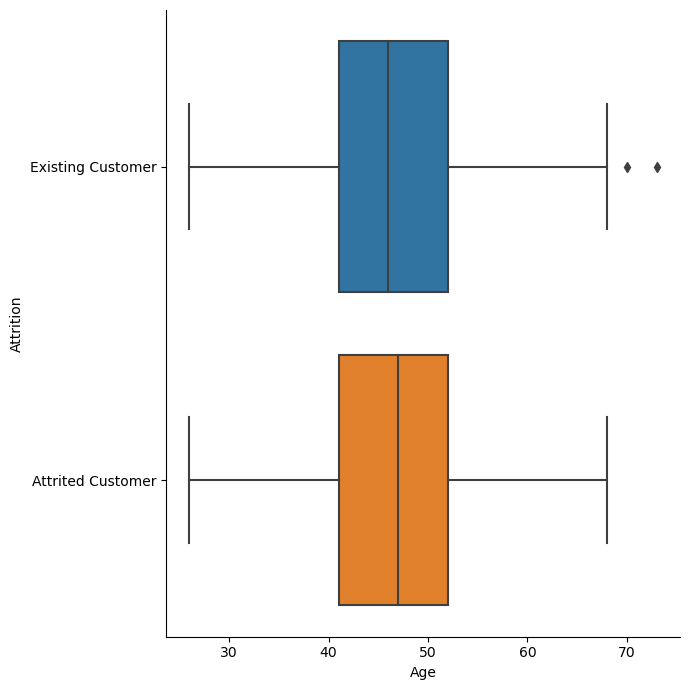

In [16]:
sns.catplot(x="Age", y="Attrition", data = bankchurners, kind= "box", height=7)

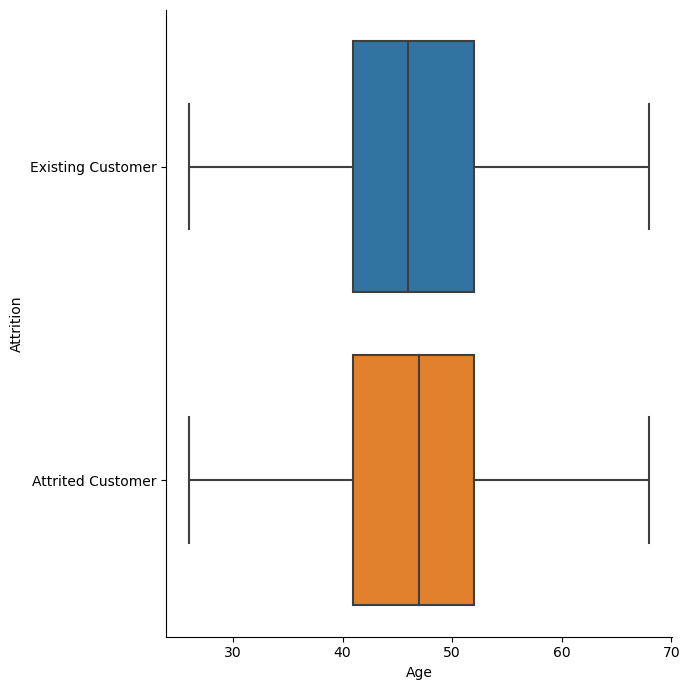

In [17]:
#Suppression de valeur abberantes
df_Age = bankchurners[ bankchurners['Age'] < 70 ] 
sns.catplot(x="Age", y="Attrition", data = df_Age, kind= "box", height=7)

/Users/cyrilleedzang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


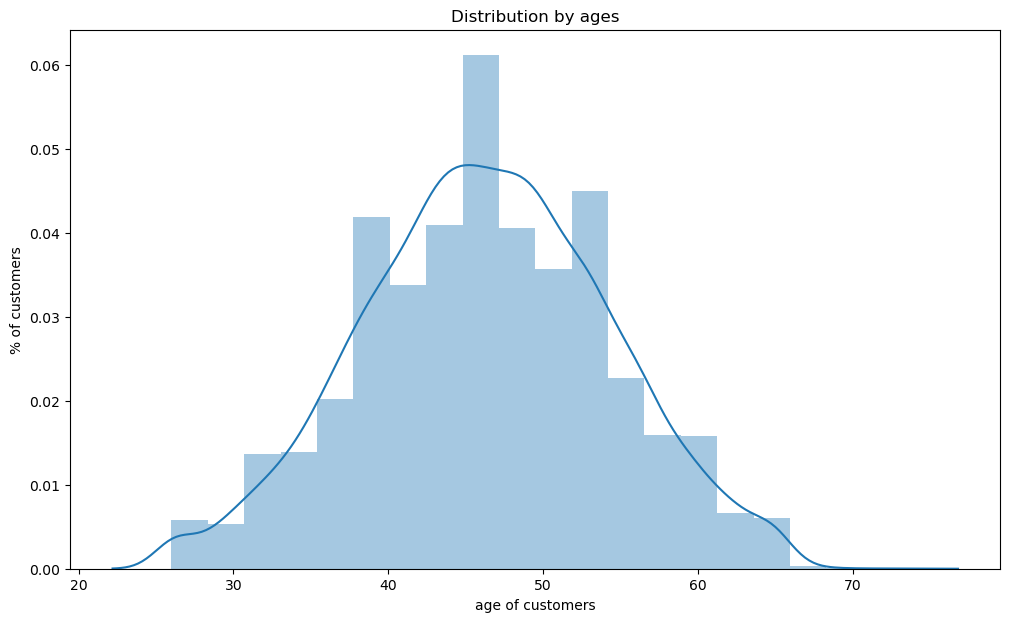

In [18]:
plt.figure(figsize=(12,7))
sns.distplot(bankchurners.Age, bins=20)
plt.xlabel('age of customers')
plt.ylabel('% of customers')
plt.title('Distribution by ages');

In [19]:
bankchurners['Attrition'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [20]:
bankchurners.Attrition = bankchurners.Attrition.replace(to_replace = ["Existing Customer", "Attrited Customer"], value=[1,0])
bankchurners.head()

,ClientNum,Attrition,Age,Gender,Dependents,Education,Marital,Income_cat,Card_Cat,Months,...,Inactive_Month,Contacts_on_12,Credit_Limit,Total_Solde_Balancing,Average_Rate_Open,Amount_Changed_Q4_Q1,Amount_Total_transaction,Number_Total_transaction,Count_Change_Q4_Q1,Average_Rate_Utilization
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### horizontal bar plot 

Créons un boxplot horizontal qui nous permet de comparer les clients de chaque classe de la variable 'Indicatif_Depart' qui comprends d'un côté les clients existants et de l'autre les clients mécontents c'est à dire ceux qui ont quitté la banque.
En X on a une liste de des deux varibles représentants les deux classes
En y on a une liste des nombres clients dans chaque classe

[Text(0, 0, '1627'), Text(0, 0, '8500')]

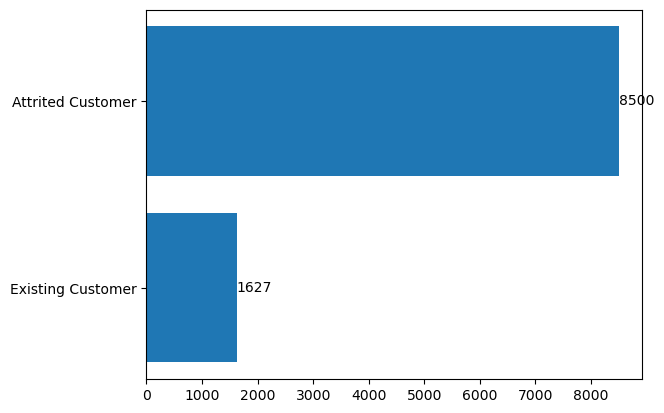

In [21]:
x = ['Existing Customer','Attrited Customer']
y = [bankchurners['Attrition'].value_counts()[0],bankchurners['Attrition'].value_counts()[1]]
fig, ax = plt.subplots()
bars = ax.barh(x, y)
ax.bar_label(bars)

In [22]:
# dataframe contenant uniquement les clients mécontents
churners_df = bankchurners[bankchurners['Attrition'] == 0]
churners_df

,ClientNum,Attrition,Age,Gender,Dependents,Education,Marital,Income_cat,Card_Cat,Months,...,Inactive_Month,Contacts_on_12,Credit_Limit,Total_Solde_Balancing,Average_Rate_Open,Amount_Changed_Q4_Q1,Amount_Total_transaction,Number_Total_transaction,Count_Change_Q4_Q1,Average_Rate_Utilization
21,708508758,0,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,0,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,0,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,0,56,M,2,Graduate,Married,$120K +,Blue,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,0,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,0,55,F,3,Uneducated,Single,Unknown,Blue,47,...,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10123,710638233,0,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,0,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,0,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


#### Niveau d'Etudes

In [23]:
bankchurners['Education'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

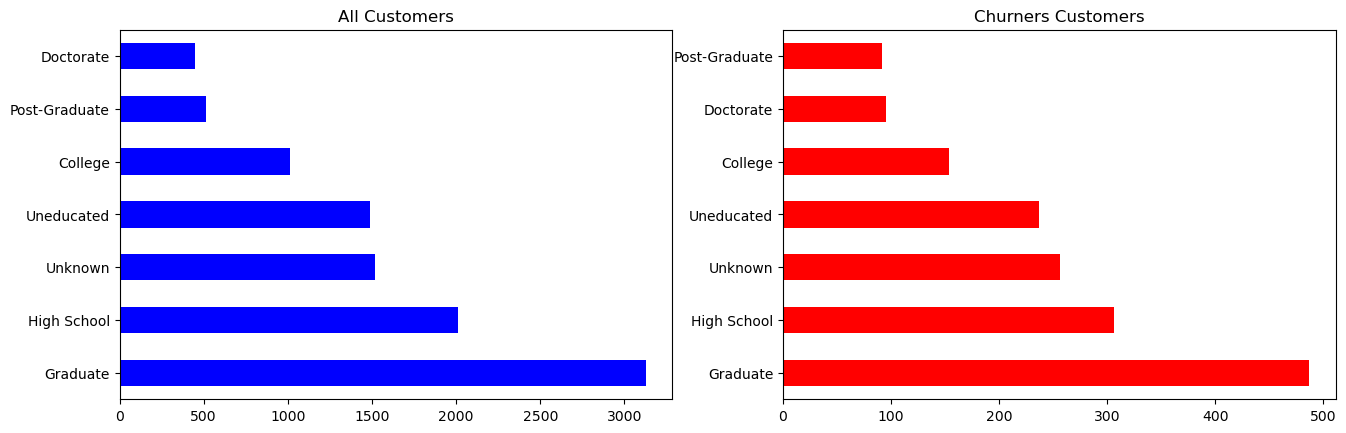

In [24]:
plt.subplot(1,2,1)
bankchurners['Education'].value_counts().plot(kind = 'barh', color = 'blue', title='All Customers')

plt.subplot(1,2,2)
churners_df['Education'].value_counts().plot(kind = 'barh', color = 'red', title='Churners Customers')

plt.subplots_adjust(left = 0.5, right= 2.4)

#### Par Genre

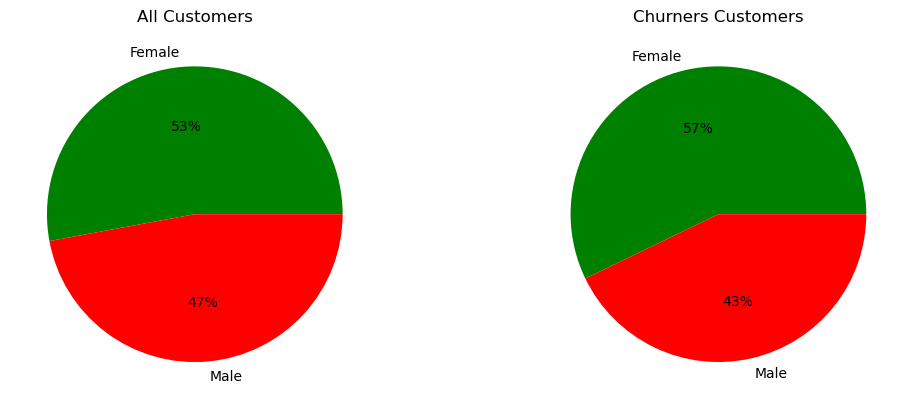

In [25]:
plt.subplot(1,2,1)
plt.pie(bankchurners['Gender'].value_counts(),labels= ['Female','Male'] ,autopct='%.0f%%', colors= 'gr')
plt.title("All Customers")

plt.subplot(1,2,2)
plt.pie(churners_df['Gender'].value_counts(),labels = ['Female','Male'], autopct='%.0f%%', colors= 'gr')
plt.title("Churners Customers")

plt.subplots_adjust(left = 0.5, right = 2)

/Users/cyrilleedzang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


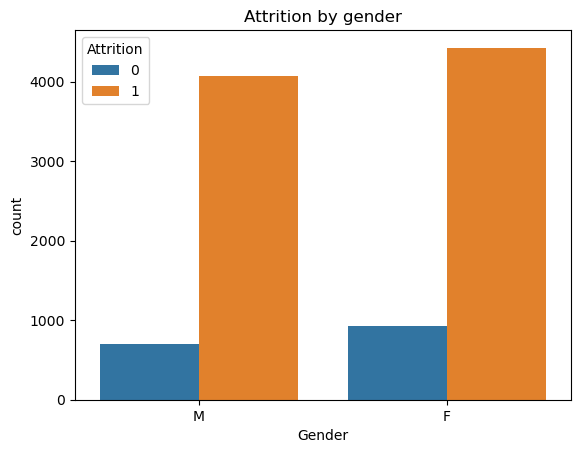

In [26]:
plt.figure()
sns.countplot(bankchurners.Gender, hue=bankchurners.Attrition)
plt.title(u"Attrition by gender");

#### Duree d'enregistrement

Text(0.5, 1.0, 'Churned Customer Registration ')

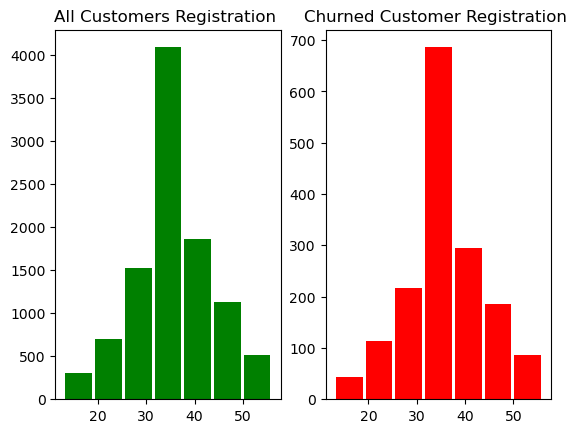

In [27]:
plt.plot()
plt.subplot(1,2,1)
plt.hist(bankchurners['Months'],bins = 7, rwidth = 0.9, color = 'g')
plt.title('All Customers Registration ')

plt.subplot(1,2,2)
plt.hist(churners_df['Months'], bins = 7, rwidth = 0.9, color = 'r')
plt.title('Churned Customer Registration ')

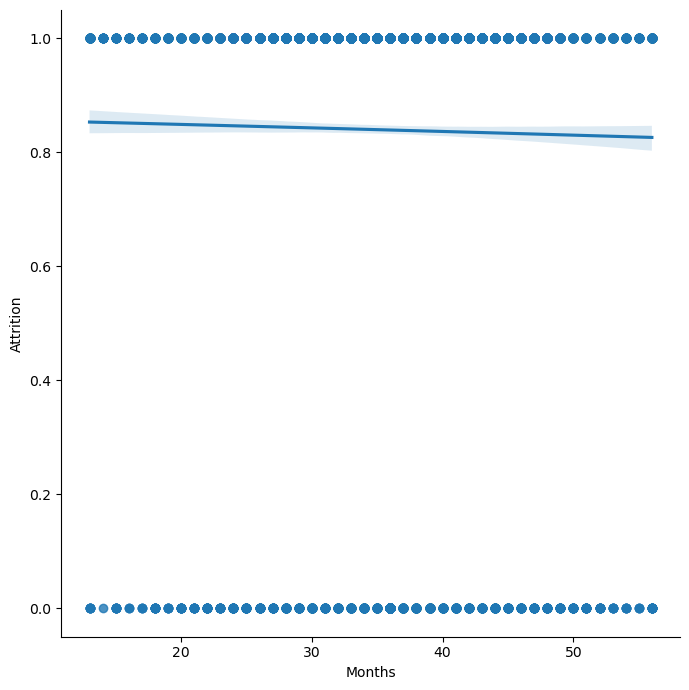

In [28]:
#probabilité de partir en fonction du nombre de mois enregistré dans la banque
sns.lmplot(x="Months", y="Attrition", data= bankchurners, logistic = True, height=7)

#### Categorie de salaire

In [29]:
bankchurners['Income_cat'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

[Text(0, 0, '3561'),
 Text(0, 0, '1790'),
 Text(0, 0, '1535'),
 Text(0, 0, '1402'),
 Text(0, 0, '1112'),
 Text(0, 0, '727')]

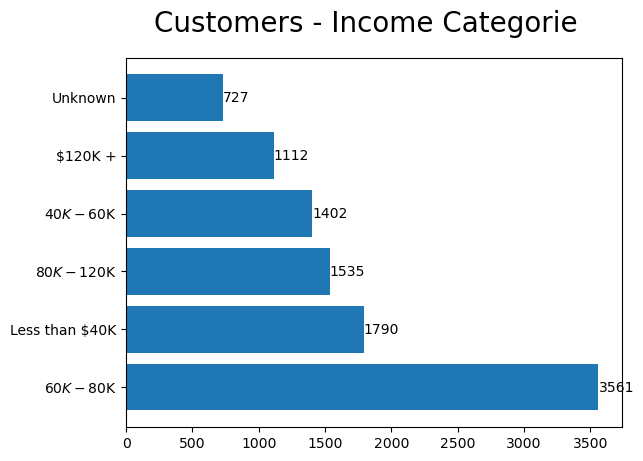

In [30]:
x = ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown']
y = [bankchurners['Income_cat'].value_counts()[0],bankchurners['Income_cat'].value_counts()[1],
     bankchurners['Income_cat'].value_counts()[2],bankchurners['Income_cat'].value_counts()[3],
     bankchurners['Income_cat'].value_counts()[4],bankchurners['Income_cat'].value_counts()[5]]
fig, ax = plt.subplots()
fig.suptitle('Customers - Income Categorie', fontsize=20)
bars = ax.barh(x, y)
ax.bar_label(bars)

[Text(0, 0, '612'),
 Text(0, 0, '271'),
 Text(0, 0, '242'),
 Text(0, 0, '189'),
 Text(0, 0, '187'),
 Text(0, 0, '126')]

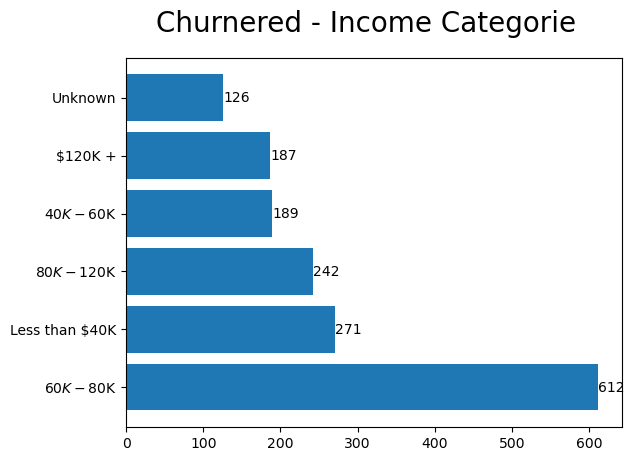

In [31]:
x = ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown']
y = [churners_df['Income_cat'].value_counts()[0],churners_df['Income_cat'].value_counts()[1],
     churners_df['Income_cat'].value_counts()[2],churners_df['Income_cat'].value_counts()[3],
     churners_df['Income_cat'].value_counts()[4],churners_df['Income_cat'].value_counts()[5]]
fig, ax = plt.subplots()
fig.suptitle('Churnered - Income Categorie', fontsize=20)
bars = ax.barh(x, y)
ax.bar_label(bars)

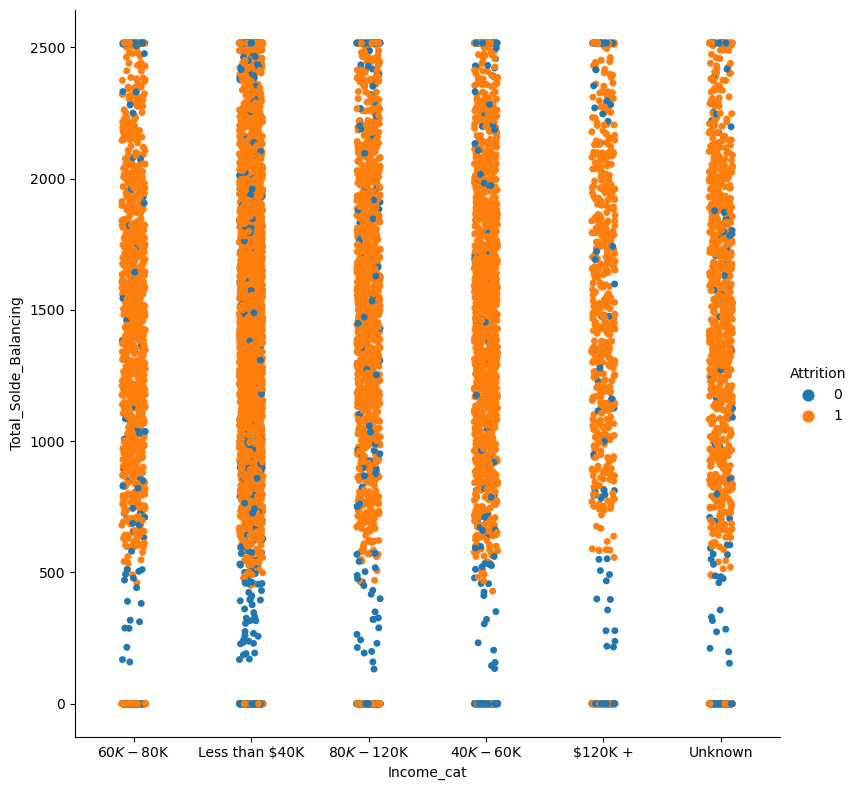

In [32]:
g = sns.catplot(x="Income_cat", y="Total_Solde_Balancing", 
                data=bankchurners, height=8, hue="Attrition")
g.set_axis_labels("Income_cat","Total_Solde_Balancing");

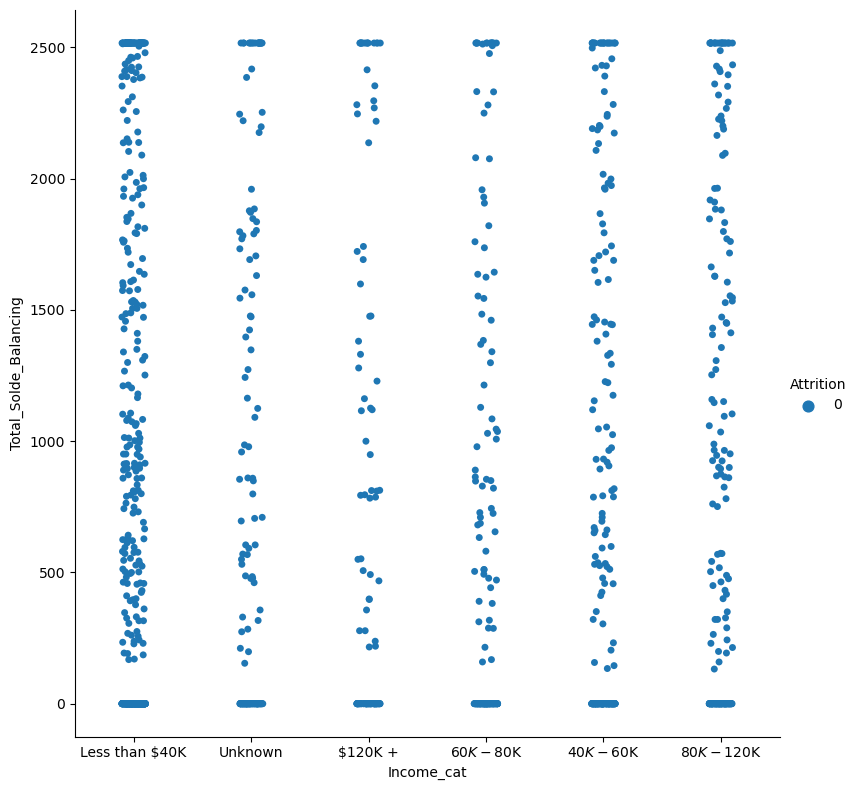

In [33]:
g = sns.catplot(x="Income_cat", y="Total_Solde_Balancing", 
                data=churners_df, height=8, hue="Attrition")
g.set_axis_labels("Income_cat","Total_Solde_Balancing");

Text(0.5, 0.98, 'ONE TITLE FOR ALL')

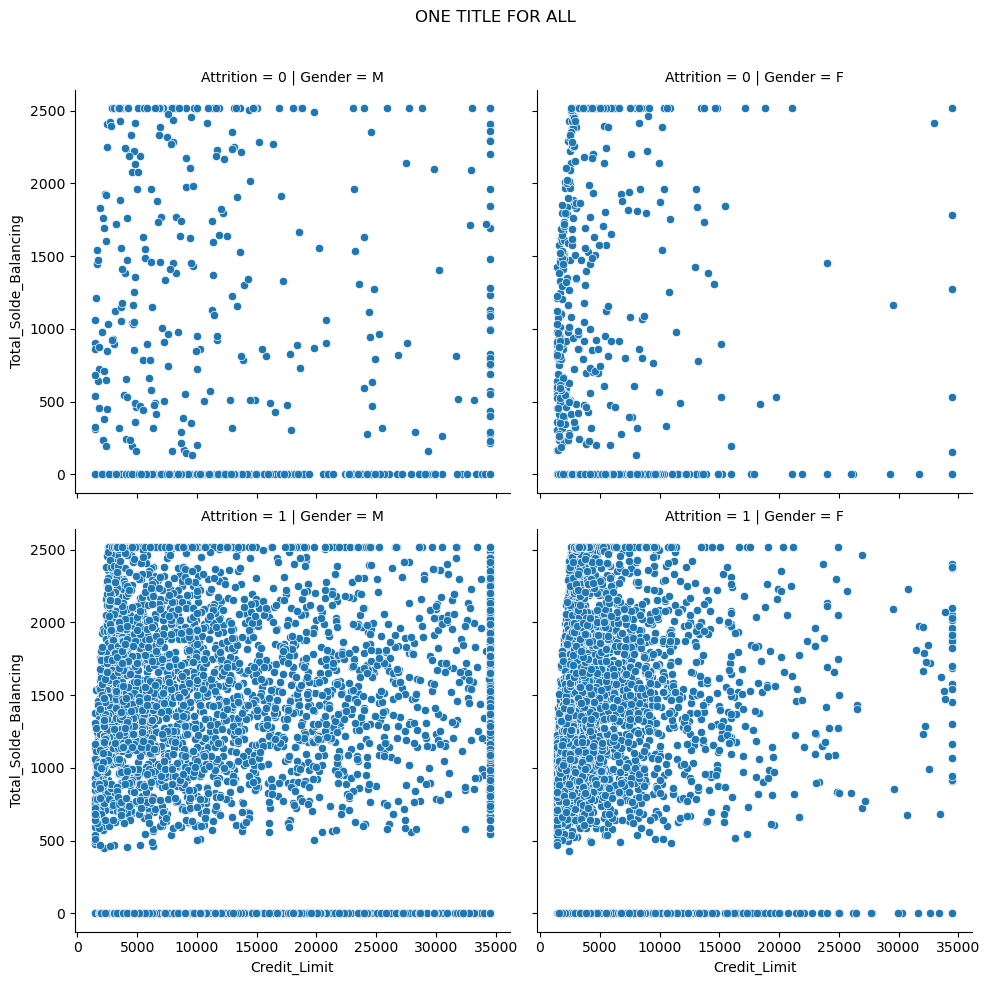

In [34]:

rp = sns.relplot(x='Credit_Limit', y='Total_Solde_Balancing', data=bankchurners,
                 col='Gender', row='Attrition',
                 kind='scatter')
# rp is a FacetGrid; 
# relplot is a nice organized way to use it

rp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
rp.fig.suptitle('ONE TITLE FOR ALL')

In [35]:
corr = bankchurners.corr()
corr

,ClientNum,Attrition,Age,Dependents,Months,Relationship_counts,Inactive_Month,Contacts_on_12,Credit_Limit,Total_Solde_Balancing,Average_Rate_Open,Amount_Changed_Q4_Q1,Amount_Total_transaction,Number_Total_transaction,Count_Change_Q4_Q1,Average_Rate_Utilization
ClientNum,1.000000,0.046430,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Attrition,0.046430,1.000000,-0.018203,-0.018991,-0.013687,0.150005,-0.152449,-0.204491,0.023873,0.263053,0.000285,0.131063,0.168598,0.371403,0.290054,0.178410
Age,0.007613,-0.018203,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependents,0.006772,-0.018991,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months,0.134588,-0.013687,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Relationship_counts,0.006907,0.150005,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Inactive_Month,0.005729,-0.152449,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_on_12,0.005694,-0.204491,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.023873,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Solde_Balancing,0.000825,0.263053,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022


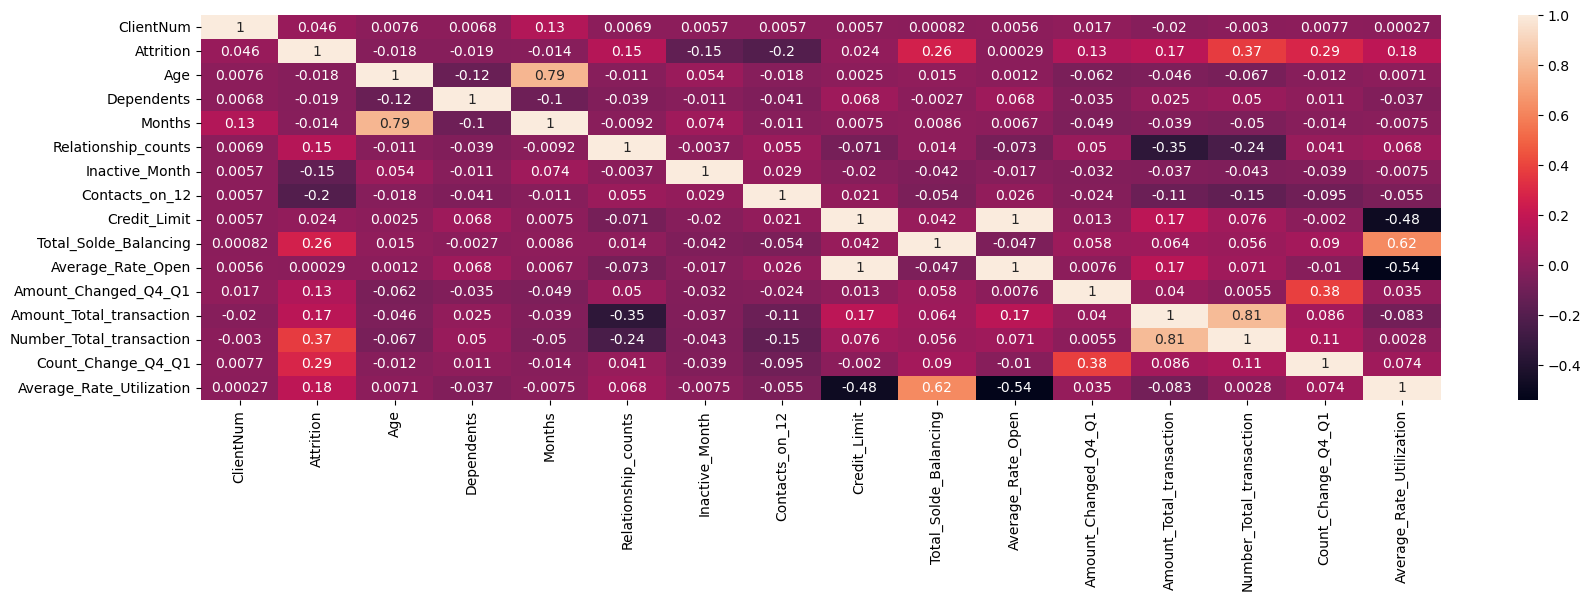

In [36]:
#affichage en heatmap 
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(corr, annot=True, ax =ax)
plt.savefig('heatmap_churners.png')
# plus d'infos : https://seaborn.pydata.org/generated/seaborn.heatmap.html